In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [113]:
# Read dataset
df = pd.read_csv('Basquiat_Dataset.csv')

In [114]:
df.head()

,Title,Type,Primary Medium,Year Created,Length (in),Width (in),Area (in),Size,Hammer Price,Seller,Seller City,Seller Country,Month,Year Sold,Unique Colors,Contrast Score,Brightness Score
0,Untitled,Painting,Acrylic,1982,72,68,4896,Medium,98000000,Sotheby's,New York City,United States,May,2017,462137,36.51,117.47
1,In This Case,Painting,Acrylic,1983,77,73,5621,Medium,81000000,Christie's,New York City,United States,May,2021,374696,19.60,137.63
2,Untitled,Painting,Acrylic,1982,94,197,18518,Large,73869000,Other,New York City,United States,May,2022,367901,20.81,127.06
3,Versus Medici,Painting,Acrylic,1982,84,54,4536,Medium,44000000,Sotheby's,New York City,United States,May,2021,327100,31.42,142.12
4,Dustheads,Painting,Acrylic,1982,72,84,6048,Medium,43500000,Christie's,New York City,United States,May,2013,592217,44.29,96.69


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              139 non-null    object 
 1   Type               139 non-null    object 
 2   Primary Medium     139 non-null    object 
 3   Year Created       139 non-null    int64  
 4   Length (in)        139 non-null    int64  
 5   Width (in)         139 non-null    int64  
 6   Area (in)          139 non-null    int64  
 7   Size               139 non-null    object 
 8   Hammer Price       139 non-null    int64  
 9   Seller             139 non-null    object 
 10  Seller City        139 non-null    object 
 11  Seller Country     139 non-null    object 
 12  Month              139 non-null    object 
 13  Year Sold          139 non-null    int64  
 14  Unique Colors      139 non-null    int64  
 15  Contrast Score     139 non-null    float64
 16  Brightness Score   139 non

In [116]:
df.describe()

,Year Created,Length (in),Width (in),Area (in),Hammer Price,Year Sold,Unique Colors,Contrast Score,Brightness Score
count,139.000000,139.000000,139.000000,139.000000,1.390000e+02,139.000000,139.000000,139.000000,139.000000
mean,1982.755396,60.482014,63.071942,4433.784173,1.179914e+07,2016.223022,253385.582734,19.848993,161.184173
std,1.680415,25.041517,39.268426,3891.399159,1.422787e+07,4.254653,133217.971309,9.326082,38.829094
min,1981.000000,14.000000,11.000000,154.000000,1.000000e+06,2005.000000,14392.000000,2.500000,45.300000
25%,1982.000000,39.500000,31.500000,1239.000000,3.750000e+06,2013.000000,151878.000000,13.170000,134.645000
50%,1982.000000,66.000000,60.000000,3600.000000,7.903000e+06,2017.000000,259823.000000,19.130000,159.560000
75%,1983.000000,77.000000,82.000000,6027.000000,1.279677e+07,2020.000000,355499.500000,25.920000,190.705000
max,1988.000000,145.000000,211.000000,21025.000000,9.800000e+07,2022.000000,592217.000000,47.460000,243.900000


In [117]:
# Trim whitespace on column titles and make easier to handle 
df.rename(columns={'Seller ':'Seller', 'Unique Colors ':'Unique Colors', 'Brightness Score ':'Brightness Score', 
                   'Length (in)': 'Length','Width (in)': 'Width', 'Area (in)': 'Area'},inplace=True)

In [118]:
# Convert hammer price to more manageable variables
df['Hammer Price']= df['Hammer Price'].map(lambda x:x/1000000)

# Visualizations

<AxesSubplot:>

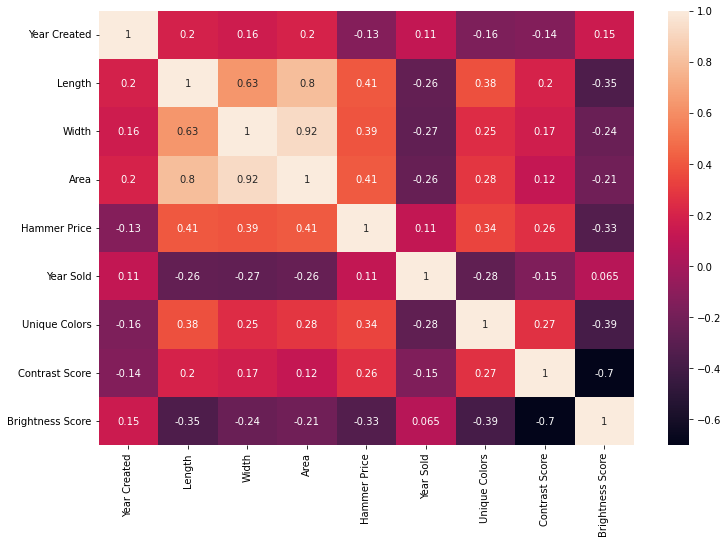

In [119]:
# Determine correlations between featuresb
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [120]:
# Drop features highly correlated to each other or redundant

df.drop(['Width','Length','Size'],axis=1,inplace=True)

<AxesSubplot:xlabel='Type', ylabel='count'>

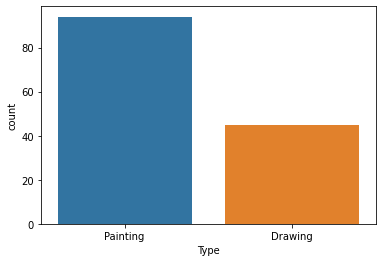

In [121]:
# Determine count of our primary categories, moving forward use mean since unbalanced data 
sns.countplot(x='Type',data=df)

[Text(0, 0, '15.8789'), Text(0, 0, '3.27702')]

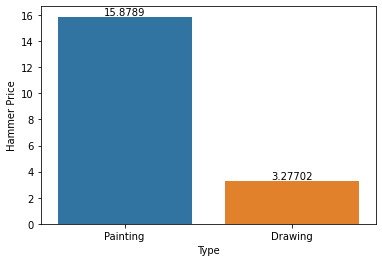

In [122]:
# On average, paintings are worth 5x drawings 
ax = sns.barplot(x='Type',y='Hammer Price',data=df,estimator=np.mean,ci=False,)
ax.bar_label(ax.containers[0])

In [123]:
df.groupby('Primary Medium').sum()['Hammer Price'].sort_values()

Primary Medium
Felt tip              2.022858
Pastels               2.655400
Wax Crayon            3.250000
Colored Pencils       3.550000
Pencil                5.000000
Ink                   8.907272
Oilstick            142.526222
Acrylic            1472.169251
Name: Hammer Price, dtype: float64

[Text(0, 0, '15.6614'),
 Text(0, 0, '4.45394'),
 Text(0, 0, '3.55'),
 Text(0, 0, '2.22682'),
 Text(0, 0, '2.6554'),
 Text(0, 0, '2.02286'),
 Text(0, 0, '1.625'),
 Text(0, 0, '1.25')]

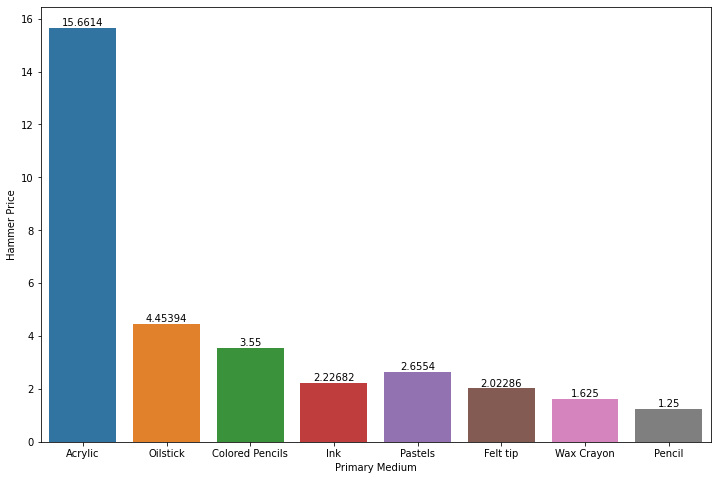

In [124]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Primary Medium',y='Hammer Price',data=df,estimator=np.mean,ci=False)
ax.bar_label(ax.containers[0])

In [125]:
# Earlier years seem to have higher sales 
df.groupby('Year Created').sum()['Hammer Price'].sort_values()

Year Created
1988     15.877759
1987     31.111392
1986     47.029926
1985     48.137993
1984    119.837694
1983    247.593713
1981    268.978186
1982    861.514340
Name: Hammer Price, dtype: float64

In [126]:
 df.groupby('Year Created').count()['Title'].sort_values()

Year Created
1988     2
1985     4
1986     5
1987     7
1984    15
1983    21
1981    25
1982    60
Name: Title, dtype: int64

[Text(0, 0, '1111.03'),
 Text(0, 0, '155.651'),
 Text(0, 0, '338.638'),
 Text(0, 0, '22.0874'),
 Text(0, 0, '12.673')]

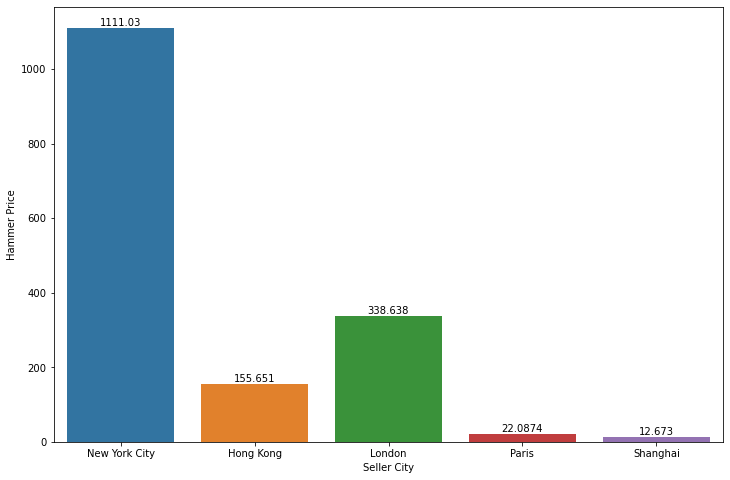

In [127]:
# No surprise, Basquiat was born and raised in Brooklyn and live most of his life in New York
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Seller City',y='Hammer Price',data=df,estimator=sum,ci=False)
ax.bar_label(ax.containers[0])

[Text(0, 0, '12.4835'),
 Text(0, 0, '19.4564'),
 Text(0, 0, '8.68302'),
 Text(0, 0, '11.0437'),
 Text(0, 0, '12.673')]

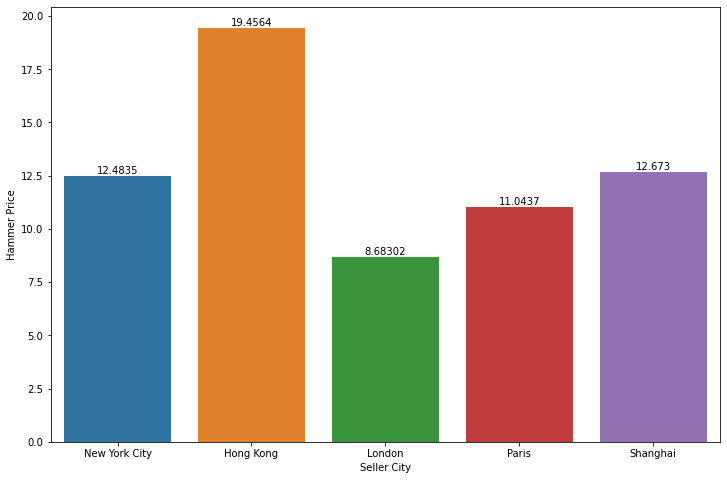

In [128]:
# Might slightly be because of currency conversion, but Chinese markets look to sell more expensive pieces  
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Seller City',y='Hammer Price',data=df,estimator=np.mean,ci=False)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1.20727'),
 Text(0, 0, '47.5657'),
 Text(0, 0, '50.9372'),
 Text(0, 0, '4.4'),
 Text(0, 0, '18.15'),
 Text(0, 0, '12.8709'),
 Text(0, 0, '89.4717'),
 Text(0, 0, '193.33'),
 Text(0, 0, '93.9457'),
 Text(0, 0, '73.8563'),
 Text(0, 0, '48.9672'),
 Text(0, 0, '196.749'),
 Text(0, 0, '190.355'),
 Text(0, 0, '72.6979'),
 Text(0, 0, '66.0084'),
 Text(0, 0, '363.693'),
 Text(0, 0, '115.876')]

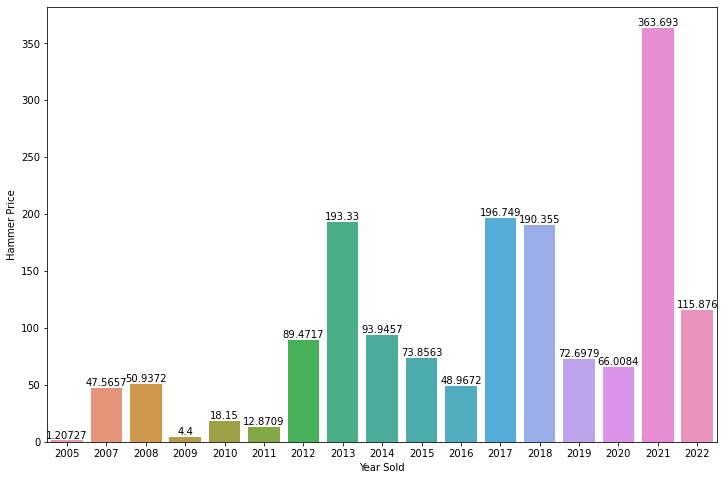

In [129]:
# Huge spike in sales for 2021! Why?
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Year Sold',y='Hammer Price',data=df,estimator=sum,ci=False)
ax.bar_label(ax.containers[0])

<AxesSubplot:xlabel='Contrast Score', ylabel='Hammer Price'>

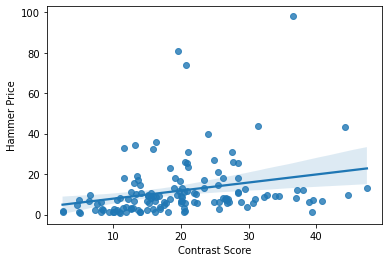

In [130]:
# Determine if contrast impacts hammer price, slight positive correlation
sns.regplot(x='Contrast Score', y='Hammer Price',data=df)

<AxesSubplot:xlabel='Brightness Score', ylabel='Hammer Price'>

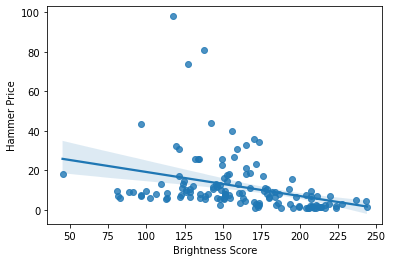

In [131]:
# Determine if brightness impacts hammer price, slight negative correlation
sns.regplot(x='Brightness Score', y='Hammer Price',data=df)

<AxesSubplot:xlabel='Unique Colors', ylabel='Hammer Price'>

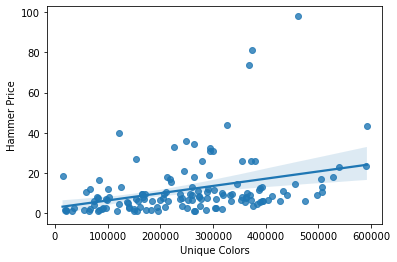

In [132]:
# Determine if colorfullness impacts hammer price, slight positve correlation
sns.regplot(x='Unique Colors', y='Hammer Price',data=df)

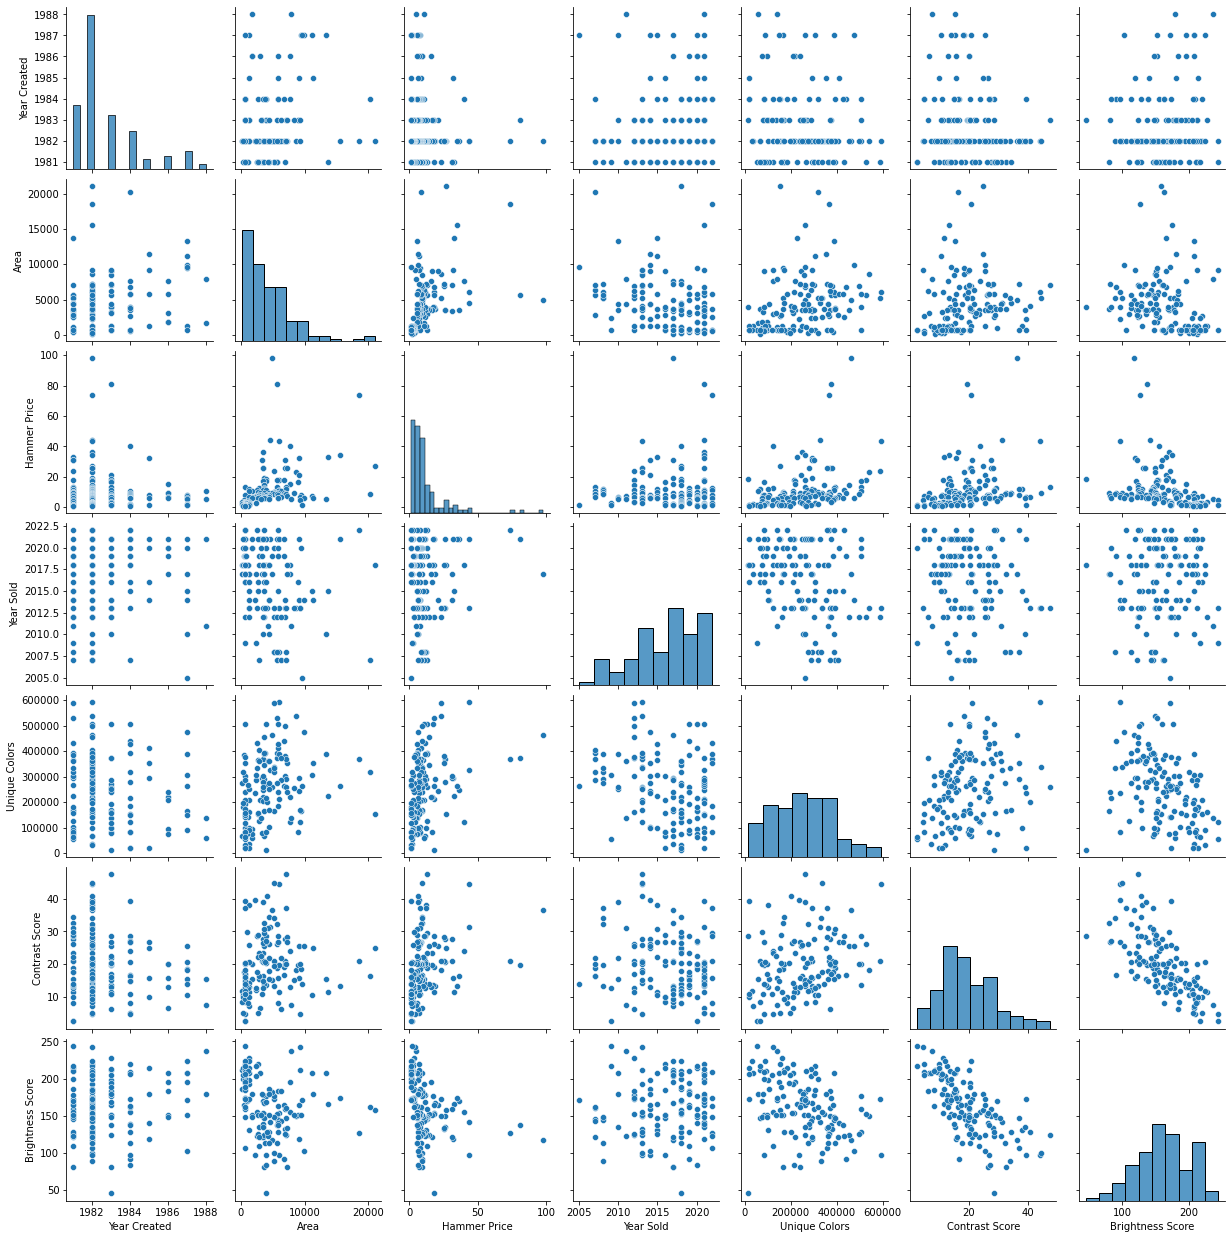

In [133]:
# Let's take a big picture view of the data
sns.pairplot(df)

# Preprocessing

### Outliers

<AxesSubplot:xlabel='Area', ylabel='Hammer Price'>

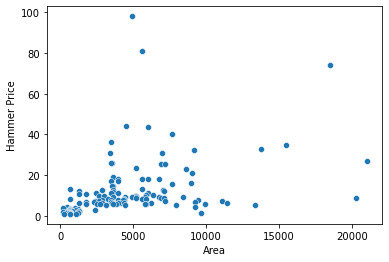

In [134]:
# Remove data points which do not follow general trend of data from highly correlated features
sns.scatterplot(x='Area',y='Hammer Price',data=df)

In [135]:
# Remove 4 outliers
df.drop(df[df['Area'] > 20000].index,axis=0,inplace=True)
df.drop(df[df['Hammer Price'] > 80].index,axis=0,inplace=True)

<AxesSubplot:xlabel='Area', ylabel='Hammer Price'>

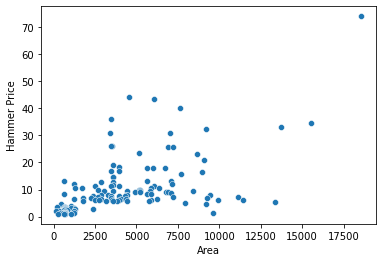

In [136]:
sns.scatterplot(x='Area',y='Hammer Price',data=df)

<AxesSubplot:xlabel='Unique Colors', ylabel='Hammer Price'>

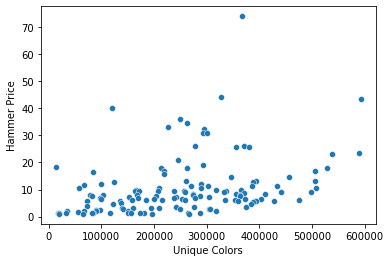

In [137]:
sns.scatterplot(x='Unique Colors',y='Hammer Price',data=df)

In [138]:
# Remove 2 outliers
df.drop(df[df['Hammer Price']>70].index,axis=0,inplace=True)

<AxesSubplot:xlabel='Unique Colors', ylabel='Hammer Price'>

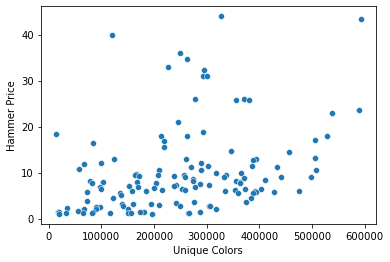

In [139]:
sns.scatterplot(x='Unique Colors',y='Hammer Price',data=df)

<AxesSubplot:xlabel='Contrast Score', ylabel='Hammer Price'>

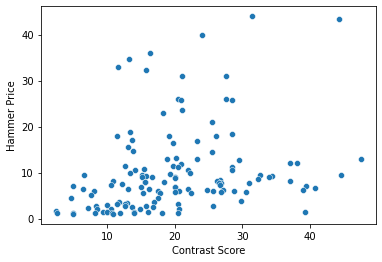

In [140]:
sns.scatterplot(x='Contrast Score',y='Hammer Price',data=df)

In [141]:
# Remove 4 outliers
df.drop(df[(df['Contrast Score']<20) & (df['Hammer Price']>30)].index,axis=0,inplace=True)

<AxesSubplot:xlabel='Contrast Score', ylabel='Hammer Price'>

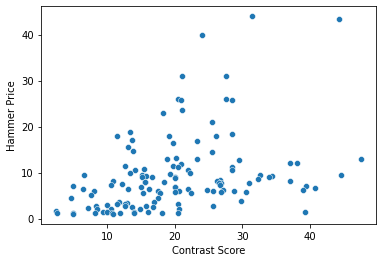

In [142]:
sns.scatterplot(x='Contrast Score',y='Hammer Price',data=df)

In [143]:
# Removing outliers increased correlations with all features 
df.corr()

,Year Created,Area,Hammer Price,Year Sold,Unique Colors,Contrast Score,Brightness Score
Year Created,1.000000,0.312395,-0.161613,0.130223,-0.165284,-0.141862,0.162350
Area,0.312395,1.000000,0.395607,-0.396112,0.369184,0.206523,-0.254989
Hammer Price,-0.161613,0.395607,1.000000,-0.043159,0.381769,0.367563,-0.404220
Year Sold,0.130223,-0.396112,-0.043159,1.000000,-0.307949,-0.163884,0.091160
Unique Colors,-0.165284,0.369184,0.381769,-0.307949,1.000000,0.261898,-0.373434
Contrast Score,-0.141862,0.206523,0.367563,-0.163884,0.261898,1.000000,-0.709859
Brightness Score,0.162350,-0.254989,-0.404220,0.091160,-0.373434,-0.709859,1.000000


### Data Transformation

In [144]:
df.head()

,Title,Type,Primary Medium,Year Created,Area,Hammer Price,Seller,Seller City,Seller Country,Month,Year Sold,Unique Colors,Contrast Score,Brightness Score
3,Versus Medici,Painting,Acrylic,1982,4536,44.0,Sotheby's,New York City,United States,May,2021,327100,31.42,142.12
4,Dustheads,Painting,Acrylic,1982,6048,43.5,Christie's,New York City,United States,May,2013,592217,44.29,96.69
5,Flexible,Painting,Acrylic,1984,7650,40.0,Other,New York City,United States,May,2018,121109,24.02,155.57
10,La Hara,Painting,Acrylic,1981,3384,31.0,Christie's,New York City,United States,May,2017,293449,21.03,121.50
11,Untitled,Painting,Acrylic,1981,7004,31.0,Christie's,New York City,United States,May,2014,300724,27.52,159.21


In [145]:
# Drop unnecessary and redundant columns 
df.drop(['Title','Seller Country'],axis=1,inplace=True)

In [146]:
predictors_df = df.drop(['Hammer Price'],axis=1)
target_df = df['Hammer Price']

In [147]:
predictors_df = pd.get_dummies(predictors_df, drop_first = True)

In [148]:
predictors_df.shape

(130, 27)

<AxesSubplot:>

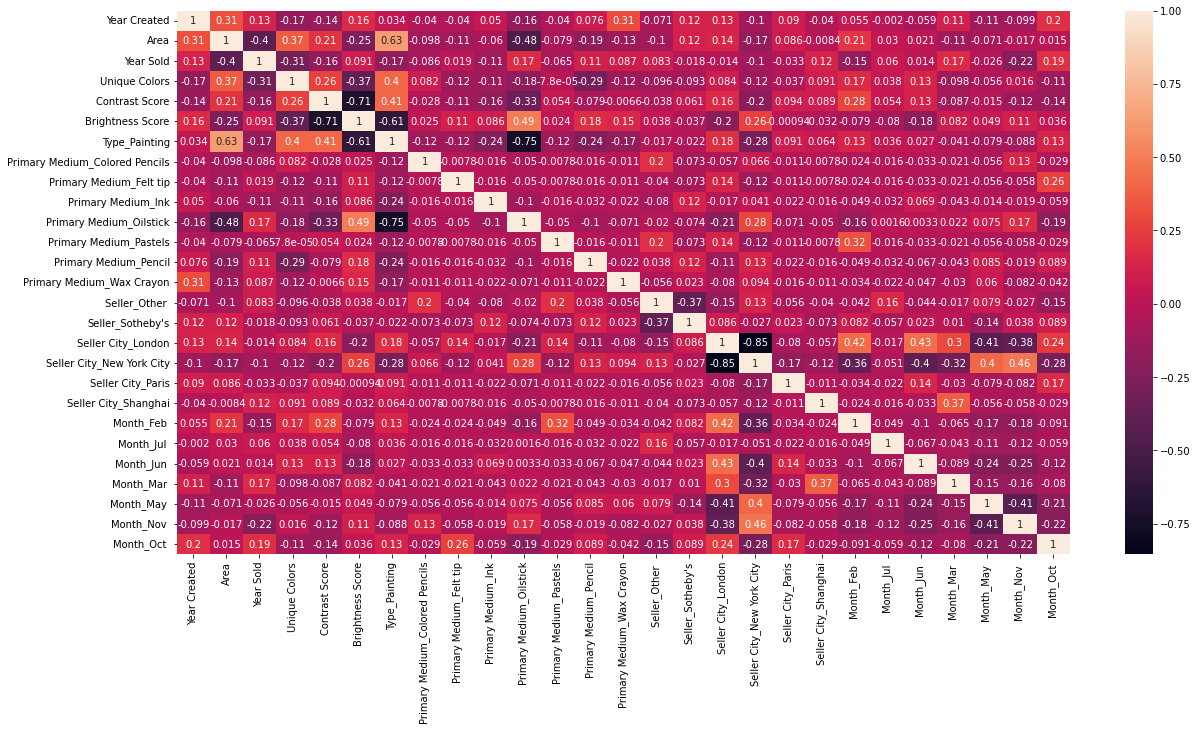

In [149]:
# Determine if any features are highly correlated with each other 
plt.figure(figsize=(20,10))
sns.heatmap(predictors_df.corr(), annot=True)

# Normalize Data

In [150]:
from sklearn import preprocessing

In [151]:
z_score_norm = preprocessing.StandardScaler()

In [152]:
predictor_df_normalized = z_score_norm.fit_transform(predictors_df)

In [153]:
predictor_df_normalized = pd.DataFrame(predictor_df_normalized, columns = predictors_df.columns)
predictor_df_normalized.head()

,Year Created,Area,Year Sold,Unique Colors,Contrast Score,Brightness Score,Type_Painting,Primary Medium_Colored Pencils,Primary Medium_Felt tip,Primary Medium_Ink,...,Seller City_New York City,Seller City_Paris,Seller City_Shanghai,Month_Feb,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct
0,-0.451662,0.227270,1.171647,0.571693,1.224913,-0.506792,0.727607,-0.088045,-0.088045,-0.178174,...,0.752506,-0.125,-0.088045,-0.272727,-0.178174,-0.374634,-0.238559,1.585406,-0.654654,-0.333333
1,-0.451662,0.749190,-0.738248,2.539560,2.590552,-1.658497,0.727607,-0.088045,-0.088045,-0.178174,...,0.752506,-0.125,-0.088045,-0.272727,-0.178174,-0.374634,-0.238559,1.585406,-0.654654,-0.333333
2,0.722659,1.302176,0.455436,-0.957304,0.439697,-0.165818,0.727607,-0.088045,-0.088045,-0.178174,...,0.752506,-0.125,-0.088045,-0.272727,-0.178174,-0.374634,-0.238559,1.585406,-0.654654,-0.333333
3,-1.038822,-0.170383,0.216700,0.321914,0.122427,-1.029534,0.727607,-0.088045,-0.088045,-0.178174,...,0.752506,-0.125,-0.088045,-0.272727,-0.178174,-0.374634,-0.238559,1.585406,-0.654654,-0.333333
4,-1.038822,1.079187,-0.499511,0.375913,0.811082,-0.073540,0.727607,-0.088045,-0.088045,-0.178174,...,0.752506,-0.125,-0.088045,-0.272727,-0.178174,-0.374634,-0.238559,1.585406,-0.654654,-0.333333


# Linear Regression Model

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from dmba import regressionSummary, adjusted_r2_score

In [155]:
X = predictor_df_normalized
y = target_df.reset_index(drop = True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [156]:
linear_model = LinearRegression()
linear_model = linear_model.fit(train_X, train_y)

In [157]:
# print performance metrics on training set
predicted_y_training = linear_model.predict(train_X)
print(regressionSummary(train_y, predicted_y_training))
print('Adjusted R-Squared',adjusted_r2_score(train_y, predicted_y_training, linear_model))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 5.2433
            Mean Absolute Error (MAE) : 3.8342
          Mean Percentage Error (MPE) : -22.6766
Mean Absolute Percentage Error (MAPE) : 75.5714
None
Adjusted R-Squared 0.4595534133693796


In [158]:
predicted_y_test = linear_model.predict(test_X) 

In [159]:
# print performance metrics on test set
regressionSummary(test_y, predicted_y_test)


Regression statistics

                      Mean Error (ME) : -0.7087
       Root Mean Squared Error (RMSE) : 7.7085
            Mean Absolute Error (MAE) : 6.2517
          Mean Percentage Error (MPE) : 17.7029
Mean Absolute Percentage Error (MAPE) : 122.3789


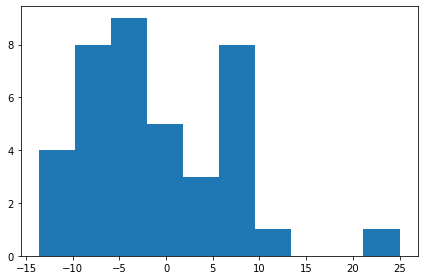

In [160]:
residuals = test_y - predicted_y_test

plt.hist(residuals, bins = 10)
plt.tight_layout()
plt.show()

# k-NN Model


In [173]:
X = predictor_df_normalized
y = target_df.reset_index(drop = True)
train_X_prediction, test_X_prediction, train_y_prediction, test_y_prediction = train_test_split(X, 
                                                            y, test_size=0.3)

In [179]:
# let's find the optimal k value
results = []
for k in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=k).fit(train_X_prediction, train_y_prediction)
    results.append({
        'k': k,
        'RMSE': round(mean_squared_error(test_y_prediction, knn.predict(test_X_prediction)) ** 0.5, 4)
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k    RMSE
0    1  8.3134
1    2  7.7048
2    3  7.3889
3    4  7.2701
4    5  7.4779
5    6  7.5126
6    7  6.9409
7    8  7.0808
8    9  7.0581
9   10  6.7151
10  11  6.6149
11  12  6.4229
12  13  6.5106
13  14  6.4104
14  15  6.5530
15  16  6.5359
16  17  6.6225
17  18  6.7099
18  19  6.6787
19  20  6.6189
20  21  6.6620
21  22  6.5874
22  23  6.6371
23  24  6.7261
24  25  6.7320
25  26  6.6985
26  27  6.7031
27  28  6.7663
28  29  6.8302


In [180]:
# Optimal k = 14
knn_p = KNeighborsRegressor(n_neighbors=14).fit(train_X_prediction, train_y_prediction)
predicted_y_training3 = knn_p.predict(train_X_prediction)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y_prediction, predicted_y_training3) ** 0.5, 4))

Root Mean Squared Error (RMSE):  6.9562
